In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.svm import SVC 
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")


In [64]:
df = pd.read_csv('/Users/ketanrode/Desktop/Projects/Credit Card Fraud Detection/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [65]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Fraud Transactions: 492
Genuine Transactions: 284315
Proportion of Fraud Transactions: 0.001727485630620034


<AxesSubplot:ylabel='Type'>

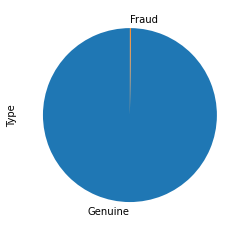

In [66]:
print("Fraud Transactions: " + str(len(df[df["Class"] == 1])))
print("Genuine Transactions: " + str(len(df[df["Class"] == 0])))
print("Proportion of Fraud Transactions: " + str(len(df[df["Class"] == 1])/ df.shape[0]))


data_p = df.copy()
data_p["Type"] = np.where(data_p["Class"] == 1 ,  "Fraud", "Genuine")

plt.figure(facecolor='white')
df_couts= data_p["Type"].value_counts()
df_couts.plot(kind="pie", startangle = 90)

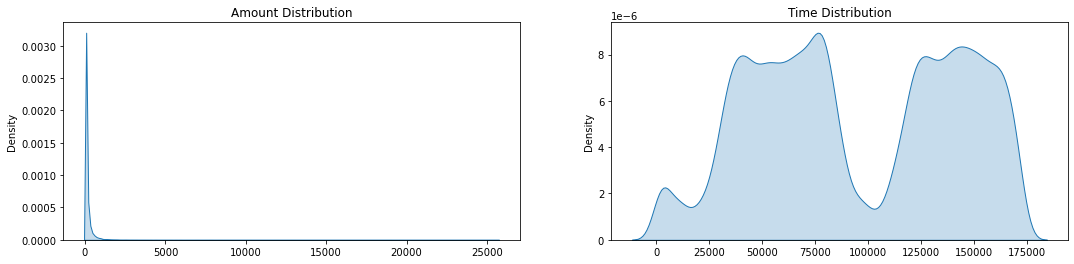

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

f, axes = plt.subplots(1, 2, figsize=(18, 4))

amount = df['Amount'].values
time = df['Time'].values

sns.kdeplot(amount, shade=True, ax=axes[0]).set_title('Amount Distribution')
sns.kdeplot(time, shade=True, ax=axes[1]).set_title('Time Distribution')

plt.show()


In [68]:
print("Average Amount (Fraud): $" + str(df[df["Class"] == 1]["Amount"].mean()))
print("Average Amount (Genuine): $" + str(df[df["Class"] == 0]["Amount"].mean()))

Average Amount (Fraud): $122.21132113821133
Average Amount (Genuine): $88.29102242225574


In [69]:
print("Amount Statistics" + "\n-------------------------------")
print(df["Amount"].describe())

Amount Statistics
-------------------------------
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


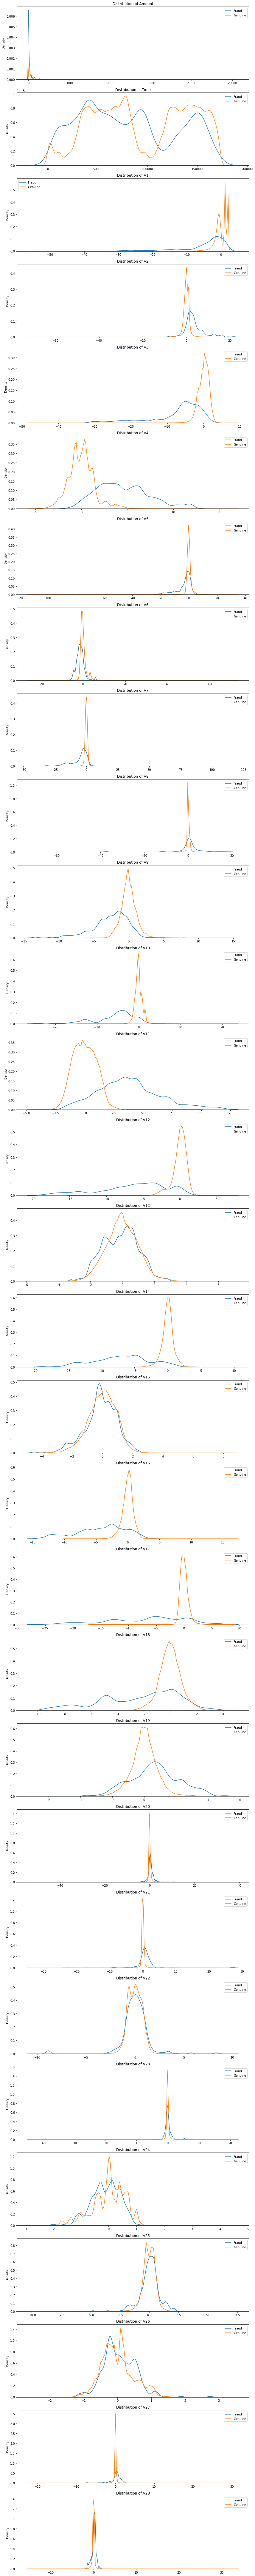

In [70]:
df_copy = df.copy()
amount = df_copy['Amount']
df_copy.drop(labels=['Amount'], axis=1, inplace = True)
df_copy.insert(0, 'Amount', amount)

columns = df_copy.iloc[:, 0:30].columns
plt.figure(figsize=(12, 30*4))
grids = gridspec.GridSpec(30, 1)

for grid, index in enumerate(columns):
    ax = plt.subplot(grids[grid])
    sns.kdeplot(df_copy[index][df_copy.Class == 1], ax=ax, bw_adjust=0.5, label='Fraud')
    sns.kdeplot(df_copy[index][df_copy.Class == 0], ax=ax, bw_adjust=0.5, label= 'Genuine')
    ax.set_xlabel("")
    ax.set_title("Distribution of " + str(index))
    ax.legend()

plt.tight_layout()
plt.show()

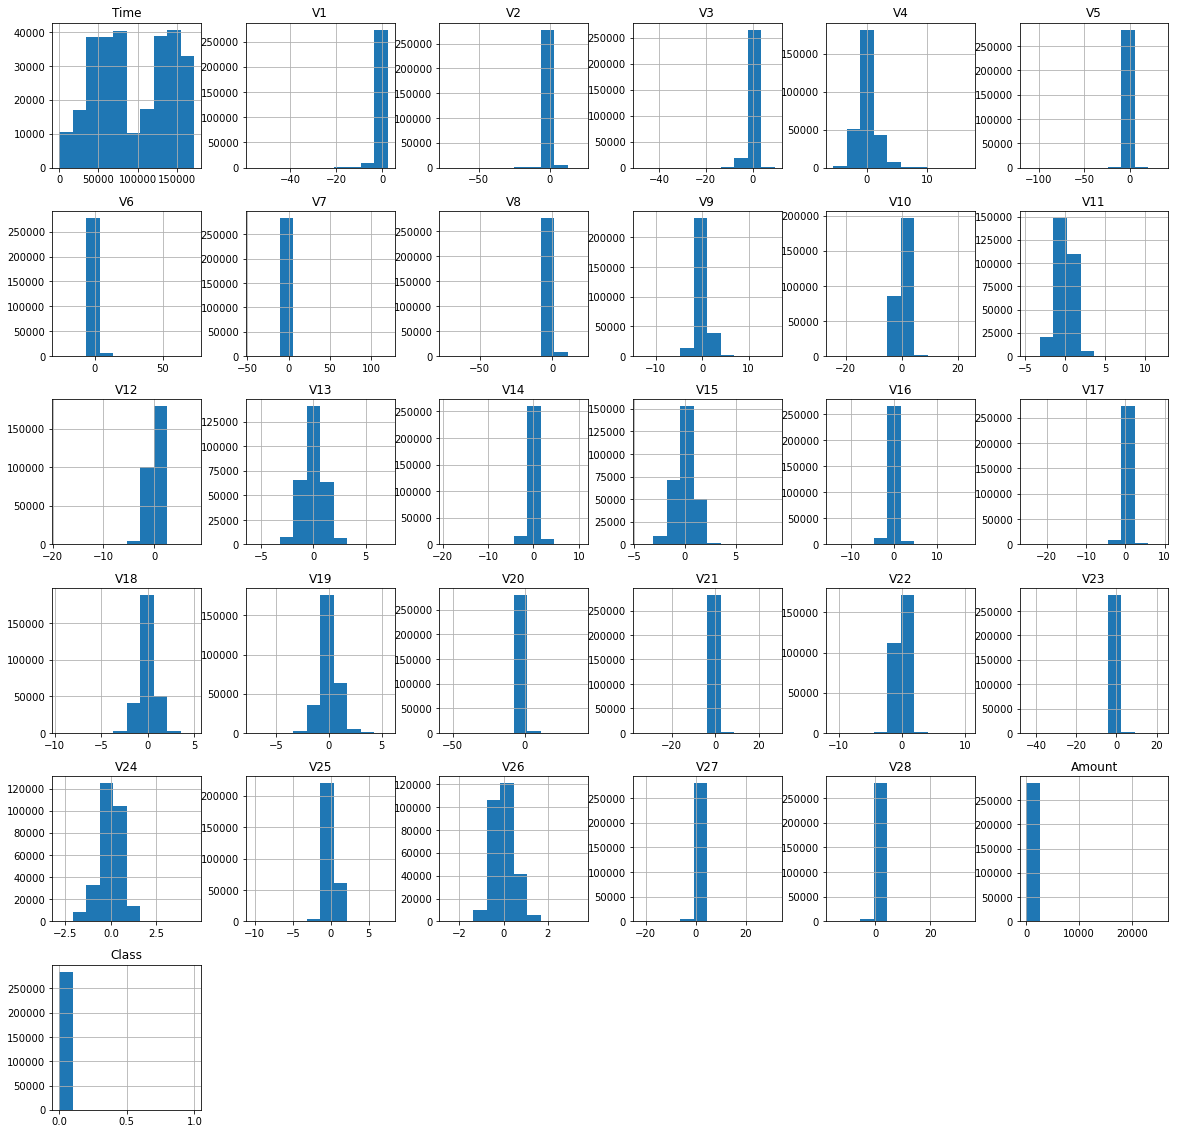

In [71]:
df.hist(figsize = (20, 20))
plt.show()

In [72]:
df.isnull().shape[0]
print("Non-missing values: " + str(df.isnull().shape[0]))
print("Missing values: " + str(df.shape[0] - df.isnull().shape[0]))

Non-missing values: 284807
Missing values: 0


In [73]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(df[["Time", "Amount"]])
df[["Time", "Amount"]] = scaler.transform(df[["Time", "Amount"]])

df.head().append(df.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0
284806,1.035022,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,2.724796,0


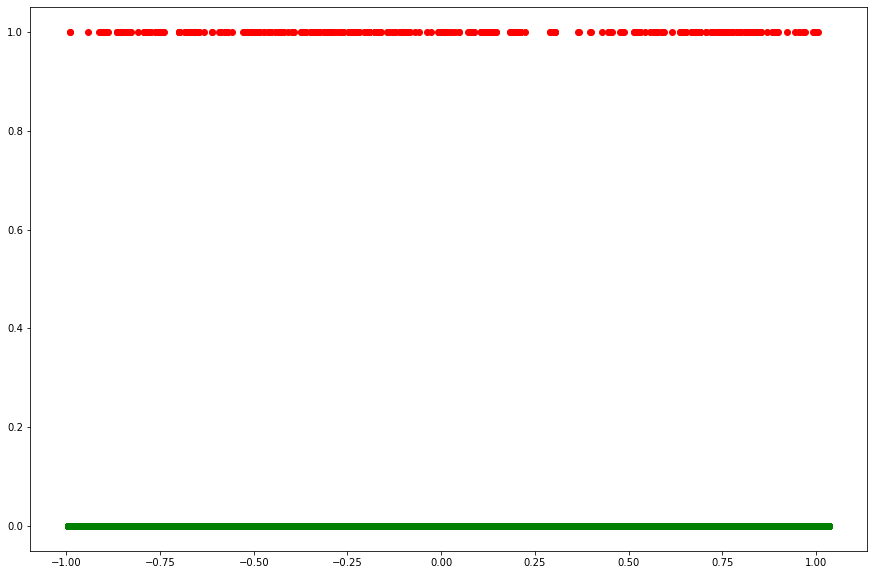

In [74]:
# Checking pattern in fraud transactions timing
plt.figure(figsize=(15,10))
plt.scatter(df.Time[df.Class==1], df.Class[df.Class==1], c="red")
plt.scatter(df.Time[df.Class==0], df.Class[df.Class==0], c="green")

Fraud transactions are random, no specific time period.

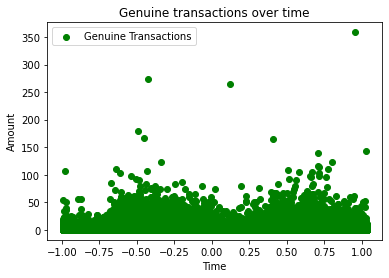

In [75]:
plt.scatter(df.Time[df.Class==0],df.Amount[df.Class==0], color=["green"])

plt.title("Genuine transactions over time")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend(["Genuine Transactions"])

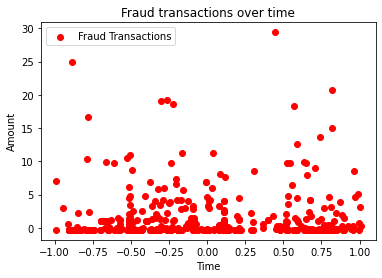

In [76]:
plt.scatter(df.Time[df.Class==1],df.Amount[df.Class==1], color=["red"])

plt.title("Fraud transactions over time")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend(["Fraud Transactions"])

Amounts of fraud transactions are generally lower than real transactions, making it difficult to detect fraud based on amount only.

In [77]:
y = df["Class"] 
X = df.iloc[:,0:30]


from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [78]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

kf = StratifiedKFold(n_splits=5, random_state = None, shuffle = False)

In [79]:
from imblearn.pipeline import make_pipeline 
from imblearn.under_sampling import NearMiss  
from imblearn.over_sampling import SMOTE  

from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [80]:
rfc = RandomForestClassifier() 
rfc.fit(X_train, y_train) 
y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
  
print("Accuracy: ", accuracy_score(y_test, y_pred)) 
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))

Accuracy:  0.9995786664794073
Precision:  0.9743589743589743
Recall:  0.7755102040816326
F1 score:  0.8636363636363635


In [81]:
def best_model_metrics(algo, params, kf=kf, X_train=X_train, 
                                         y_train=y_train, X_test=X_test, 
                                         y_test=y_test, grid_search=False, 
                                         sampling=NearMiss(), score="f1", 
                                         n_jobs=-1):
    if sampling is None:
        pipeline = make_pipeline(algo)
    else:
        pipeline = make_pipeline(sampling, algo)
   
    model_name = algo.__class__.__name__.lower()
    new_params = {f'{model_name}__{key}': params[key] for key in params}
    if grid_search:
        search = GridSearchCV(pipeline, scoring=score, param_grid=new_params, cv=kf, return_train_score=True, n_jobs=n_jobs, verbose=0)
    else:
        search = RandomizedSearchCV(pipeline, param_distributions=new_params, 
                                    cv=kf, scoring=score, return_train_score=True,
                                    n_jobs=n_jobs, verbose=0)
    search.fit(X_train, y_train)
    cv_score = cross_val_score(search, X_train, y_train, scoring=score, cv=kf)
    y_pred = search.best_estimator_.named_steps[model_name].predict(X_test)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    y_proba = search.best_estimator_.named_steps[model_name].predict_proba(X_test)[::, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    
    return {
        "best_model": search.best_estimator_,
        "model_name": model_name,
        "cv_score": cv_score,
        "recall": recall,
        "accuracy": accuracy,
        "f1_score": f1,
        "fpr": fpr,
        "tpr": tpr,
        "auc": auc,
    }

In [82]:
results = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc', 'recall', 'accuracy', 'f1_score'])

logistic_reg_under = best_model_metrics(
    algo=LogisticRegression(),
    params={"penalty": ['l1', 'l2'], 
            'C': [ 0.01, 0.1, 1, 100], 
            'solver' : ['liblinear']},
    sampling=NearMiss()
)
print(f"{logistic_reg_under['model_name']}")
print("Model:", logistic_reg_under['best_model'])
print("Accuracy:", logistic_reg_under['accuracy'])
print("Recall:", logistic_reg_under['recall'])
print("F1 Score:", logistic_reg_under['f1_score'])
results = results.append({'classifiers': logistic_reg_under["model_name"],
                            'fpr': logistic_reg_under["fpr"], 
                            'tpr': logistic_reg_under["tpr"], 
                            'auc': logistic_reg_under["auc"],
                            'recall': logistic_reg_under["recall"],
                            'accuracy': logistic_reg_under["accuracy"],
                            'f1_score': logistic_reg_under["f1_score"],
                            }, ignore_index=True)

logisticregression
Model: Pipeline(steps=[('nearmiss', NearMiss()),
                ('logisticregression',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])
Accuracy: 0.8128050279133457
Recall: 0.9183673469387755
F1 Score: 0.016600571797473023


In [83]:
support_vector_machine_under = best_model_metrics(
    algo=SVC(probability=True),
    params={'gamma': [0.1, 0.01],  
            'C': [ 0.01, 0.1], 
            'kernel': ['rbf']},
    sampling=NearMiss()
)
results = results.append({'classifiers': support_vector_machine_under["model_name"],
                            'fpr': support_vector_machine_under["fpr"], 
                            'tpr': support_vector_machine_under["tpr"], 
                            'auc': support_vector_machine_under["auc"],
                            'recall': support_vector_machine_under["recall"],
                            'accuracy': support_vector_machine_under["accuracy"],
                            'f1_score': support_vector_machine_under["f1_score"],
                            }, ignore_index=True)

In [84]:
from sklearn import tree
decision_tree_under= best_model_metrics (
    algo= tree.DecisionTreeClassifier(),
    params= {'max_depth':[3,5],
            'min_samples_leaf':[3,5],
            'min_samples_split':[8,10],
            'criterion':['gini','entropy']},
    sampling= NearMiss()
)
results = results.append({'classifiers': decision_tree_under["model_name"],
                            'fpr': decision_tree_under["fpr"], 
                            'tpr': decision_tree_under["tpr"], 
                            'auc': decision_tree_under["auc"],
                            'recall': decision_tree_under["recall"],
                            'accuracy': decision_tree_under["accuracy"],
                            'f1_score': decision_tree_under["f1_score"]
                            }, ignore_index=True)

In [85]:
knn_under = best_model_metrics(
    algo= KNeighborsClassifier(),
    params = {'n_neighbors': list(range(1, 15))},
    sampling= NearMiss()
)
results = results.append({'classifiers': knn_under["model_name"],
                            'fpr': knn_under["fpr"], 
                            'tpr': knn_under["tpr"], 
                            'auc': knn_under["auc"],
                            'recall': knn_under["recall"],
                            'accuracy': knn_under["accuracy"],
                            'f1_score': knn_under["f1_score"]
                            }, ignore_index=True)

In [86]:
results

,classifiers,fpr,tpr,auc,recall,accuracy,f1_score
0,logisticregression,"[0.0, 7.034327518289252e-05, 0.000140686550365...","[0.0, 0.0, 0.0, 0.0, 0.01020408163265306, 0.01...",0.947864,0.918367,0.812805,0.016601
1,svc,"[0.0, 0.0, 0.0, 1.758581879572313e-05, 1.75858...","[0.0, 0.01020408163265306, 0.04081632653061224...",0.939396,0.877551,0.931235,0.042064
2,decisiontreeclassifier,"[0.0, 0.3471968204839617, 0.3471968204839617, ...","[0.0, 0.8469387755102041, 0.8979591836734694, ...",0.782528,0.948980,0.606369,0.008227
3,kneighborsclassifier,"[0.0, 0.013101435002813732, 0.0161437816544738...","[0.0, 0.7755102040816326, 0.8367346938775511, ...",0.937231,0.897959,0.944524,0.052758


In [87]:
results.to_csv('undersampling_results.csv')

In [90]:
results.set_index('classifiers', inplace=True)

In [91]:
results

,fpr,tpr,auc,recall,accuracy,f1_score
classifiers,,,,,,
logisticregression,"[0.0, 7.034327518289252e-05, 0.000140686550365...","[0.0, 0.0, 0.0, 0.0, 0.01020408163265306, 0.01...",0.947864,0.918367,0.812805,0.016601
svc,"[0.0, 0.0, 0.0, 1.758581879572313e-05, 1.75858...","[0.0, 0.01020408163265306, 0.04081632653061224...",0.939396,0.877551,0.931235,0.042064
decisiontreeclassifier,"[0.0, 0.3471968204839617, 0.3471968204839617, ...","[0.0, 0.8469387755102041, 0.8979591836734694, ...",0.782528,0.948980,0.606369,0.008227
kneighborsclassifier,"[0.0, 0.013101435002813732, 0.0161437816544738...","[0.0, 0.7755102040816326, 0.8367346938775511, ...",0.937231,0.897959,0.944524,0.052758


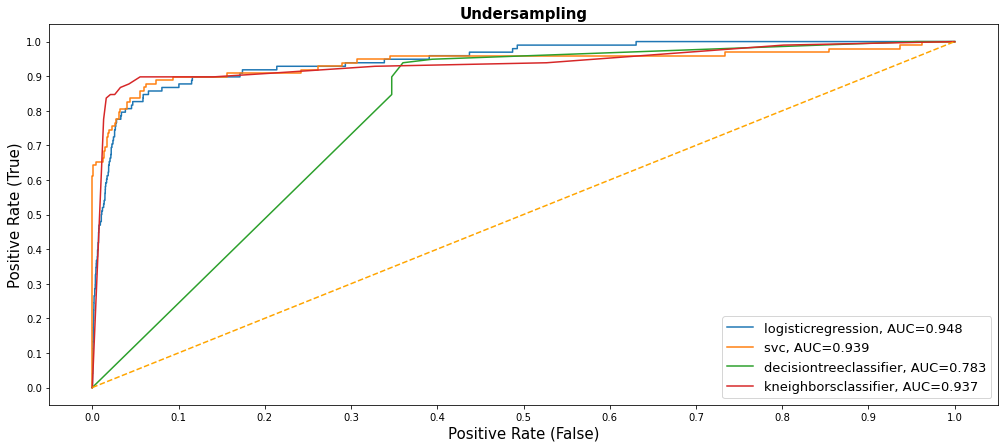

In [92]:
fig = plt.figure(figsize=(17,7))

for j in results.index:
    plt.plot(results.loc[j]['fpr'], 
             results.loc[j]['tpr'], 
             label="{}, AUC={:.3f}".format(j, results.loc[j]['auc']))
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Positive Rate (False)", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Positive Rate (True)", fontsize=15)
plt.title('Undersampling', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()

In [93]:
results_over = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [94]:
logistic_over = best_model_metrics(
    algo=LogisticRegression(),
    params={"penalty": ['l1', 'l2'], 'C': [ 0.01, 0.1, 1, 100, 100], 
            'solver' : ['liblinear']},
    sampling=SMOTE(random_state=42),
    score="f1",
    grid_search=False,
    n_jobs=2,
)
results_over = results_over.append({'classifiers': logistic_over["model_name"],
                                    'fpr': logistic_over["fpr"], 
                                    'tpr': logistic_over["tpr"], 
                                    'auc': logistic_over["auc"],
                                    'recall': logistic_over["recall"],
                                    'accuracy': logistic_over["accuracy"],
                                    'f1_score': logistic_over["f1_score"]
                              }, ignore_index=True)

In [95]:
results_over

,classifiers,fpr,tpr,auc,accuracy,f1_score,recall
0,logisticregression,"[0.0, 0.00010551491277433877, 0.00010551491277...","[0.0, 0.29591836734693877, 0.30612244897959184...",0.97882,0.975949,0.116129,0.918367


In [96]:
support_vector_machine_over = best_model_metrics(
    algo=SVC(probability=True),
    params={'gamma': [0.1, 0.01],  
            'C': [0.01, 0.1], 
            'kernel': ['rbf']},
    sampling=SMOTE(random_state=42)
)
results_over = results_over.append({'classifiers': support_vector_machine_over["model_name"],
                            'fpr': support_vector_machine_over["fpr"], 
                            'tpr': support_vector_machine_over["tpr"], 
                            'auc': support_vector_machine_over["auc"],
                            'recall': support_vector_machine_over["recall"],
                            'accuracy': support_vector_machine_over["accuracy"],
                            'f1_score': support_vector_machine_over["f1_score"],
                            }, ignore_index=True)

In [ ]:
from sklearn import tree
decision_tree_over= best_model_metrics (
    algo= tree.DecisionTreeClassifier(),
    params= {'max_depth':[3,5],
            'min_samples_leaf':[3,5],
            'min_samples_split':[8,10],
            'criterion':['gini']},
    sampling= SMOTE(random_state=42)
)
results_over = results_over.append({'classifiers': decision_tree_over["model_name"],
                            'fpr': decision_tree_over["fpr"], 
                            'tpr': decision_tree_over["tpr"], 
                            'auc': decision_tree_over["auc"],
                            'recall': decision_tree_over["recall"],
                            'accuracy': decision_tree_over["accuracy"],
                            'f1_score': decision_tree_over["f1_score"]
                            }, ignore_index=True)

In [ ]:
results_over

,classifiers,fpr,tpr,auc,accuracy,f1_score,recall
0,logisticregression,"[0.0, 0.00010551491277433877, 0.00010551491277...","[0.0, 0.29591836734693877, 0.30612244897959184...",0.978825,NaN,NaN,NaN
1,decisiontreeclassifier,"[0.0, 3.517163759144626e-05, 0.000773776027011...","[0.0, 0.0, 0.7857142857142857, 0.8061224489795...",0.967651,0.975334,0.109068,0.877551


In [ ]:
# knn_over = best_model_metrics(
#     algo= KNeighborsClassifier(),
#     params = {'n_neighbors': list(range(1,2))},
#     sampling= SMOTE(random_state=42)
# )
# results_over = results_over.append({'classifiers': knn_over["model_name"],
#                             'fpr': knn_over["fpr"], 
#                             'tpr': knn_over["tpr"], 
#                             'auc': knn_over["auc"],
#                             'recall': knn_over["recall"],
#                             'accuracy': knn_over["accuracy"],
#                             'f1_score': knn_over["f1_score"]
#                             }, ignore_index=True)

In [ ]:
results_over.to_csv('oversampling_results.csv')

In [ ]:
fig = plt.figure(figsize=(17,7))

for j in results_over.index:
    plt.plot(results_over.loc[j]['fpr'], 
             results_over.loc[j]['tpr'], 
             label="{}, AUC={:.3f}".format(j, results_over.loc[j]['auc']))
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Positive Rate (False)", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Positive Rate (True)", fontsize=15)
plt.title('Undersampling', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.show()